Todo o código-fonte está no repositorio do GitHub: <https://github.com/MarcioBulla/Movimento-de-projeteis>

# metodologia

Usaremos o python junto com o jupyter, onde facilita as aplicações e visualizações dos dados. Desta forama, para obter os graficos, precisamos encontrar como a velocidade e a posição varia com o tempo. Com isto, para resolver as EDOs, onde utilizameremos o _scipy_, _numpy_ e _matplotlib_ para gerar os graficos.

Importando bibliotecas mensionadas:

In [366]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib as mpl

Definindo parametros para plotar os graficos mais atraentes:

In [367]:
norm = mpl.colors.Normalize(vmin=0, vmax=90)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.gist_rainbow)
cmap.set_array([])
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0
plt.rcParams["lines.markersize"] = 10

# Questão 1
As condições iniciais são: $x(0)=z(0)=0$ e $\vec{v}(0)=v_0\hat{v}$.

Sendo $\vec{v_0} = v_0\cos{\theta}\hat{\imath} + v_0\sin{\theta}\hat{k}$

## Alternativa a

Para resolver esta questão precisamos desmembrar a o vetor posição em suas componetes.
$$ m \devd{\vec{r}}{t} =-mg\hat{k} - b\vec{v_0}$$

Desta forma temos duas EDO de segunda ordem.

$$ \devd{x}{t} = - \frac{b}{m} \dev{x}{t}$$
$$ \devd{z}{t} =-g - \frac{b}{m} \dev{z}{t}$$

### Resolvendo a EDOs
Usaremos as função do scipe *solve_ivp*.

#### Definindo função das EDOs para resolve elas:

In [368]:
def r(t, r, g, b, m):
    x, z, vx, vz = r
    ddx = -b/m * vx  # Derivada da segunda de x
    ddz = -g - b/m * vz  # Derivada da segunda de z
    return [vx, vz, ddx, ddz]

Definindo condições iniciais, constantes, intervalo da solução numerica:

In [369]:
# condições iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.radians(45)
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# constantes
g = 9.8
b = 3
m = 5
# Intervalo da solução
t = np.linspace(0, 5, 100, True)

Resolvendo a EDO numericamente com o metodo LSODA:

In [370]:
sol = solve_ivp(fun=r, t_span=[t[0], t[-1]], y0=[0, 0, vx0,
                                                 vz0], method="LSODA", t_eval=t, args=(g, b, m))

#### Plotando grafico da posição horizontal em função do tempo:

(0.0, 22.0)

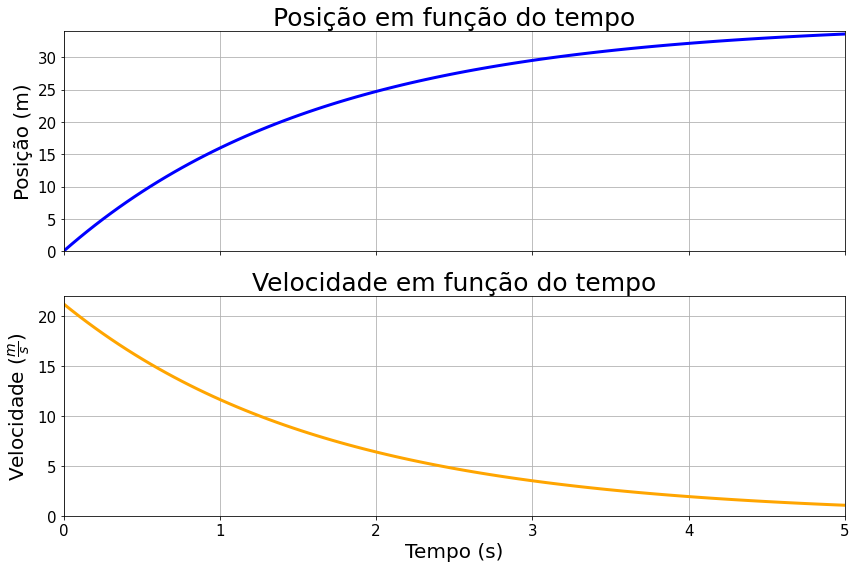

In [371]:
fig, ((x), (vx)) = plt.subplots(2, 1, sharex=True)
x.plot(sol.t, sol.y[0], label="Posição em fução do tempo", c="b")
x.set_ylabel("Posição (m)")
x.set_title("Posição em função do tempo")
x.set_xlim(0, 5)
x.set_ylim(0, 34)

vx.plot(sol.t, sol.y[2], label="Velocidade em função do tempo", c="orange")
vx.set_xlabel("Tempo (s)")
vx.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vx.set_title("Velocidade em função do tempo")
vx.set_xlim(0, 5)
vx.set_ylim(0, 22)

Grafico da velocidade em função do tempo, note que esta favoravel com o que esperamos com uma velociade tendendo a zero ea posição estaginando quando isto ocorre.

#### Plotando grafico da posição vertical em função do tempo:

(-15.0, 22.0)

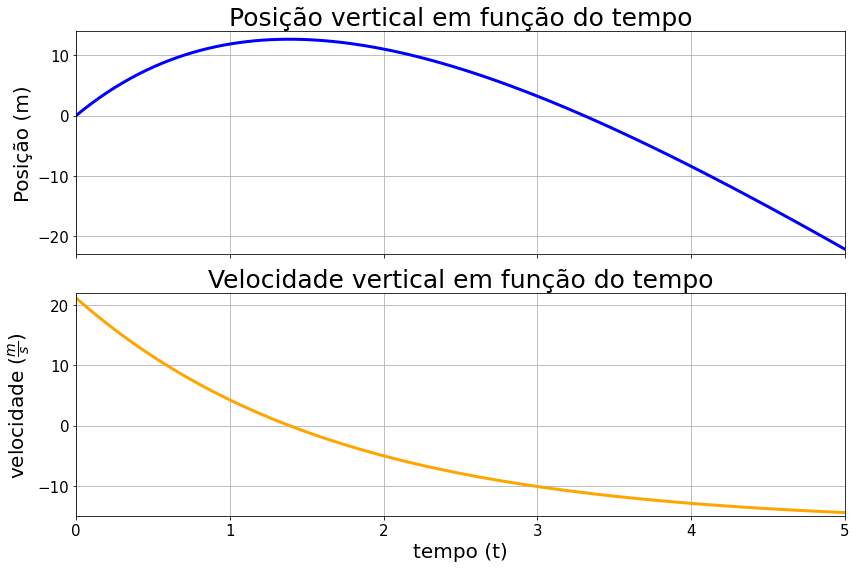

In [372]:
fig, ((z), (vz)) = plt.subplots(2, 1, sharex=True)
z.plot(sol.t, sol.y[1], c="b")
z.set_ylabel("Posição (m)")
z.set_title("Posição vertical em função do tempo")
z.set_xlim(0, 5)
z.set_ylim(-23, 14)

vz.plot(sol.t, sol.y[3], c="orange")
vz.set_ylabel(r"velocidade ($\frac{m}{s}$)")
vz.set_title("Velocidade vertical em função do tempo")
vz.set_xlabel("tempo (t)")
vz.set_xlim(0, 5)
vz.set_ylim(-15, 22)

Perceba que chegamos no que esperamos novamente. Pois, diferente de $x$, $z$ parte de zero e chega novamente em $0$.

### Alternativa b

Para fazer varias soluçoes diferentes usaremos um *loop* onde trocaremos somente os angulos $\theta$ em um intervalo de $[0; 90]$ com 90 pontos. Desta forma, temos:

Text(0, 0.5, 'Vertical (m)')

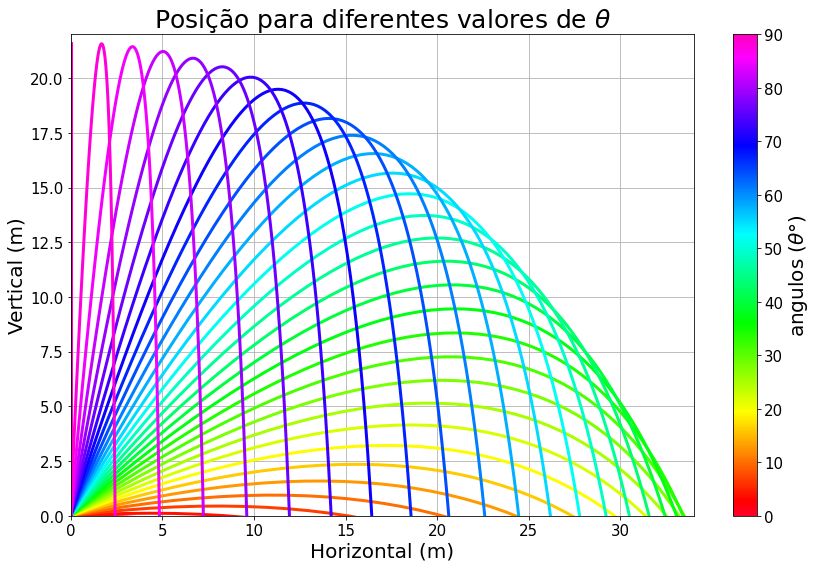

In [373]:
for _ in np.arange(0, 91, 3):  # loop variando $\theta$
    # Tranformando graus em radianos
    theta_i = np.radians(_)
    # Condições iniciais ara cada angulação
    vx0i = v0*np.cos(theta_i)
    vz0i = v0*np.sin(theta_i)
    # Solução para cada eixo
    sol_i = solve_ivp(r, [t[0], t[-1]], [x0, z0, vx0i,
                      vz0i], "LSODA", t, args=(g, b, m))
    # Plotagem do grafico para cada theta
    plt.plot(sol_i.y[0], sol_i.y[1], c=cmap.to_rgba(_ + 1))


plt.colorbar(cmap, ticks=np.arange(0, 95, 10), label=r"angulos ($\theta$°)")
plt.xlim(0, 34)
plt.ylim(0, 22)
plt.title(r"Posição para diferentes valores de $\theta$")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")

Note que, o alcanse máximo fica proximo aos 30° graus, menor que os 45° graus no caso de sem resistencia do ar. Isto deve ocorre, pois, quanto mais tempo durar o percurso mais ele se desacelerar, além disso, para ele se manter mais tempo ele deve se angular mais, logo, perdendo velocidade horizontal. Desta forma, quando maior for o fator da resistencia do ar, menor sera o angulo para o alcace maximo.

### Alternativa c

Podemos agrupar estes pontos usaremo o parametro *event* da função *solve_ivp*, no qual agrupa onde os pontos onde a unção é zero. Desta forma, pegamos os ponto onde $\dev{z}{t}=0$, ou seja o poto onde $z$ é máximo; $z=0$ onde a particula esta no chão, logo podemos pegar o maximo alcance. 

#### Definindo as funções onde queremos capturar os pontos:

In [374]:
def topo(t, r, g, b, m):
    x, z, vx, vz = r
    return vz


def alcance(t, r, g, b, m):
    x, z, vx, vz = r
    return z

#### Fazendo soluções para varios $\theta$ igual o que foi feito no grafico anterio, porem com mais pontos:

In [375]:
pontos = np.array([[], [], []])  # Criando array para recolher os pontos

for _ in np.linspace(0, 180, 200, True):  # loop variando $\theta$
    # Tranformando graus em radianos
    theta_i = np.radians(_)
    # Condições iniciais para cada angulação
    vz0i = v0*np.sin(theta_i)
    vx0i = v0*np.cos(theta_i)
    # Solução do eixos x e z
    sol_i = solve_ivp(fun=r, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i],
                      method="LSODA", t_eval=t, args=(g, b, m), events=(topo, alcance), dense_output=True)
    # Recolhendo pontos do evento topo e alcance
    pontos = np.append(pontos, [[_], sol_i.y_events[0][:, 1], [
                       sol_i.y_events[1][:, 0][1] if _ not in [0, 90, 180] else sol_i.y_events[1][:, 0][0]]], 1)

#### Plotando grafico da altura e alcance maximo em função do angulo:

Text(0, 0.5, 'Alcance máximo (m)')

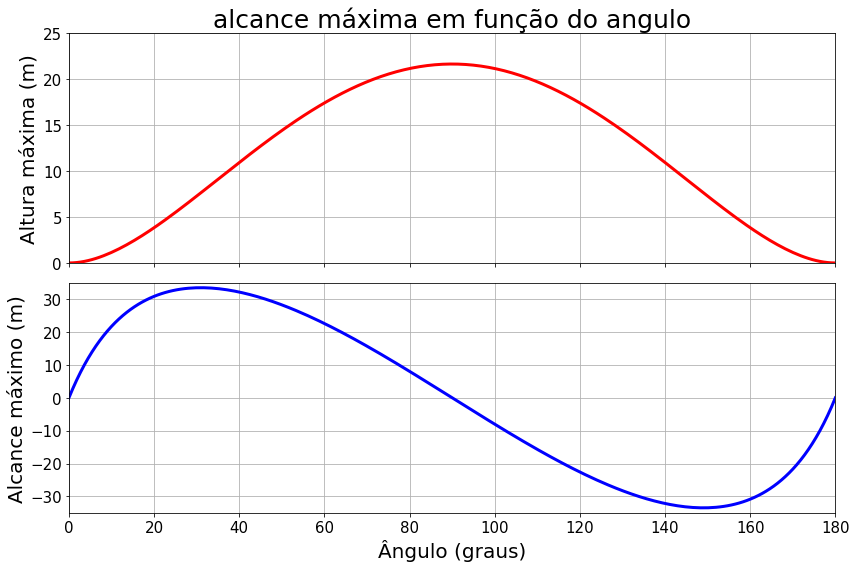

In [376]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True)

ax1.plot(pontos[0], pontos[1], c="r")
ax1.set_title("Altura máxima em função do angulo")
ax1.set_xlim(pontos[0][0], pontos[0][-1])
ax1.set_ylim(0, 25)
ax1.set_ylabel("Altura máxima (m)")

ax2.plot(pontos[0], pontos[2], c="b")
ax1.set_title("alcance máxima em função do angulo")
ax2.set_xlim(pontos[0][0], pontos[0][-1])
ax2.set_ylim(-35, 35)
ax2.set_xlabel("Ângulo (graus)")
ax2.set_ylabel("Alcance máximo (m)")

# Questão 2
Semelhante a questão anterior porem agora com vento e a constante ao quadrado da resistencia do ar. Desta forma, temos:
$$ $$

As condições iniciais são: $x(0)=z(0)=0$ e $\vec{v}(0)=v_0\hat{v}$.

Sendo $\vec{v_0} = v_0\cos{\theta}\hat{\imath} + v_0\sin{\theta}\hat{k}$
## Alternativa a

Para resolver esta questão precisamos desmembrar a o vetor posição em suas componetes.
$$ m \devd{\vec{r}}{t} =-mg\hat{k} - b^2 (\vec{v_0}+\vec{v_w})$$
onde $\vec{v_w} = u\hat{\imath} + w\hat{k}$

Desta forma temos duas EDO de segunda ordem.

$$ \devd{x}{t} = - \frac{b^2}{m} \left(\dev{x}{t} + u\right)$$
$$ \devd{z}{t} =-g - \frac{b^2}{m} \left(\dev{z}{t} + w\right)$$


#### Definindo função das EDOs para resolve elas:

In [377]:
def r_v(t, r, b, m, u, w):
    x, z, vx, vz = r
    ddx = -np.power(b,2)/m * (vx - u)  # Derivada da segunda de x
    ddz = -g - np.power(b,2)/m * (vz - w)  # Derivada da segunda de z
    return [vx, vz, ddx, ddz]

#### Definindo condições iniciais e constantes e valores da solução:

In [378]:
# CondiçÕes iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.pi/4
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# Constantes
g = 9.8
b = 3
m = 5
u = 1
w = -2
# Intervalo da solução
t = np.linspace(0, 8, 100, True)

#### Resolvendo a EDO numericamente com o metodo LSODA:

In [379]:
sol_v = solve_ivp(fun=r_v, t_span=[t[0], t[-1]], y0=[x0, z0, vx0, vz0], args=(
    b, m, u, w), t_eval=t, method="LSODA")

#### Plotando grafico da solução para valecidade e posição horizontal:

(0.0, 22.0)

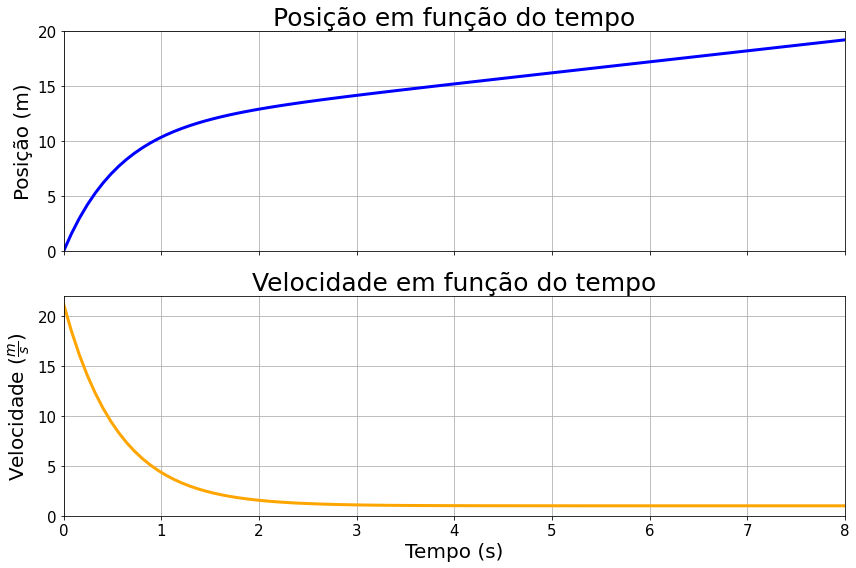

In [385]:
fig, ((xu), (vxu)) = plt.subplots(2, 1, sharex=True)
xu.plot(sol_v.t, sol_v.y[0], label="Posição em fução do tempo", c="b")
xu.set_ylabel("Posição (m)")
xu.set_title("Posição em função do tempo")
xu.set_xlim(0, 8)
xu.set_ylim(0, 20)

vxu.plot(sol_v.t, sol_v.y[2], label="Velocidade em função do tempo", c="orange")
vxu.set_xlabel("Tempo (s)")
vxu.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vxu.set_title("Velocidade em função do tempo")
vxu.set_xlim(0, 8)
vxu.set_ylim(0, 22)

Grafico da velocidade em função do tempo, note que esta favoravel com o que esperamos com uma velociade tendendo a uma velocidade terminal mais rapidamente, por causa do vento contrario e a posição retrocendendo.

#### Plotando grafico da posição vertical em função do tempo:

(-10.0, 22.0)

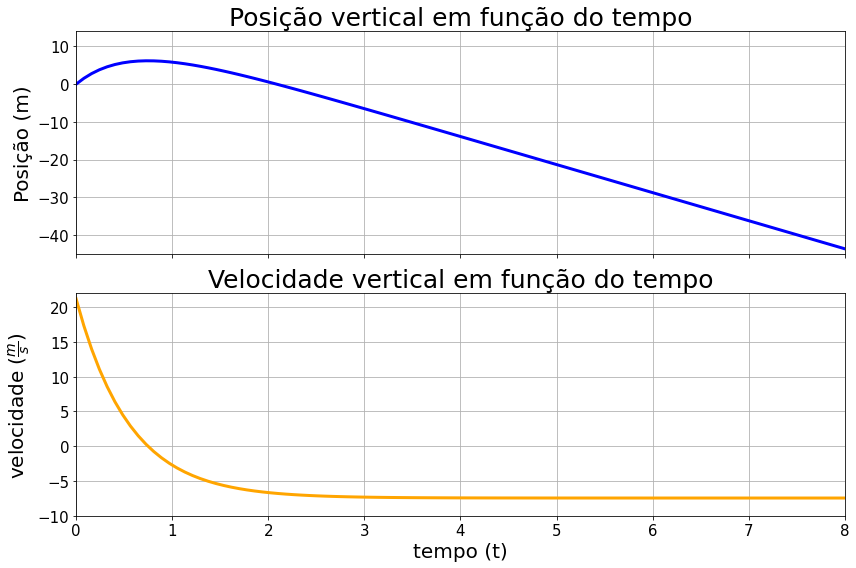

In [387]:
fig, ((zw), (vzw)) = plt.subplots(2, 1, sharex=True)
zw.plot(sol_v.t, sol_v.y[1], c="b")
zw.set_ylabel("Posição (m)")
zw.set_title("Posição vertical em função do tempo")
zw.set_xlim(0, 8)
zw.set_ylim(-45, 14)

vzw.plot(sol_v.t, sol_v.y[3], c="orange")
vzw.set_ylabel(r"velocidade ($\frac{m}{s}$)")
vzw.set_title("Velocidade vertical em função do tempo")
vzw.set_xlabel("tempo (t)")
vzw.set_xlim(0, 8)
vzw.set_ylim(-10, 22)

Texto explicando grafico !!

## Alternativa b

Como o objetivo é pegar divesas combinações entre $\theta$, $u$ e $w$. Sabendo disto usaremos a função *random.randint* para aleatorizar as escolhas das constantes $u$ e $w$ variando $\theta$ entre $[5,85]$. Desta forma, temos:

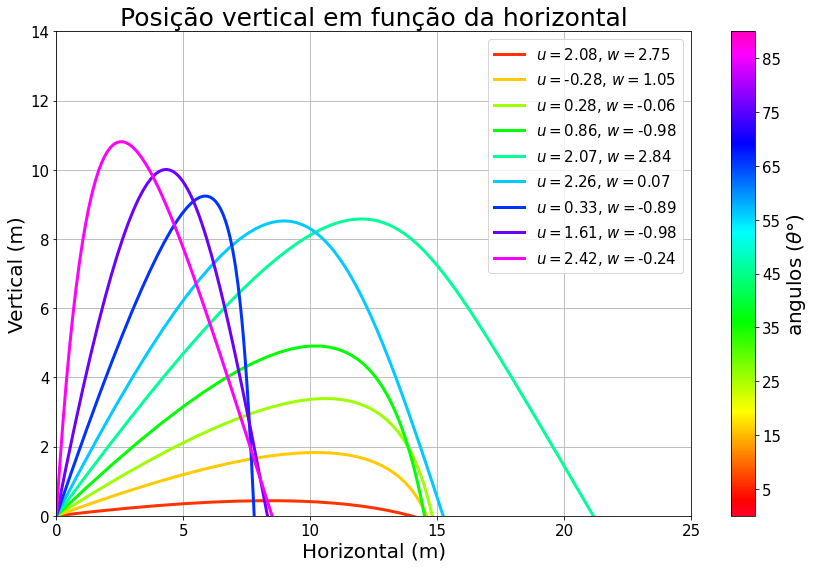

In [455]:
for _ in np.arange(5,90, 10):
    theta_i = np.radians(_)
    u, w = np.random.uniform(-1,3,2)
    vx0i = v0*np.cos(theta_i)
    vz0i = v0*np.sin(theta_i)
    sol_vi = solve_ivp(fun=r_v, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], args=(
        b, m, u, w), t_eval=t, method="LSODA", events=(topov, alcancev))
    plt.plot(sol_vi.y[0], sol_vi.y[1], label=r"$u=$"f"{u:.2f},"+r" $w=$"f"{w:.2f}", c=cmap.to_rgba(_ + 1))

plt.colorbar(cmap, ticks=np.arange(5, 95, 10), label=r"angulos ($\theta$°)")
plt.xlim(0, 25)
plt.ylim(0, 14)
plt.title(r"Posição vertical em função da horizontal")
plt.xlabel("Horizontal (m)")
plt.ylabel("Vertical (m)")
plt.legend()

Gerando o grafico com diferente EXPLICAR MAIS

# Questão 3


#### Definindo função par resolver as EDOs:

In [430]:
def r_h(t, r, g, b, m, h):
    x, z, vx, vz = r
    ddx = -b/m*vx*np.exp(-z/h)
    ddz = -g - b/m*vz*np.exp(-z/h)
    return [vx, vz, ddx, ddz]

Definindo condições iniciais, constantes, intervalo da solução numerica:

In [446]:
# condições iniciais
x0 = 0
z0 = 0
v0 = 30
theta = np.radians(45)
vx0 = v0*np.cos(theta)
vz0 = v0*np.sin(theta)
# constantes
g = 9.8
b = 3
m = 5
h = 2
# Intervalo da solução
t = np.linspace(0, 10, 200, True)

#### Resolvendo a EDO numericamente com o metodo LSODA:

In [447]:
sol = solve_ivp(fun=r_h, t_span=[t[0], t[-1]], y0=[0, 0, vx0,
                                                 vz0], method="LSODA", t_eval=t, args=(g, b, m, h))

#### Plotando grafico da posição horizontal em função do tempo:

(-1.0, 22.0)

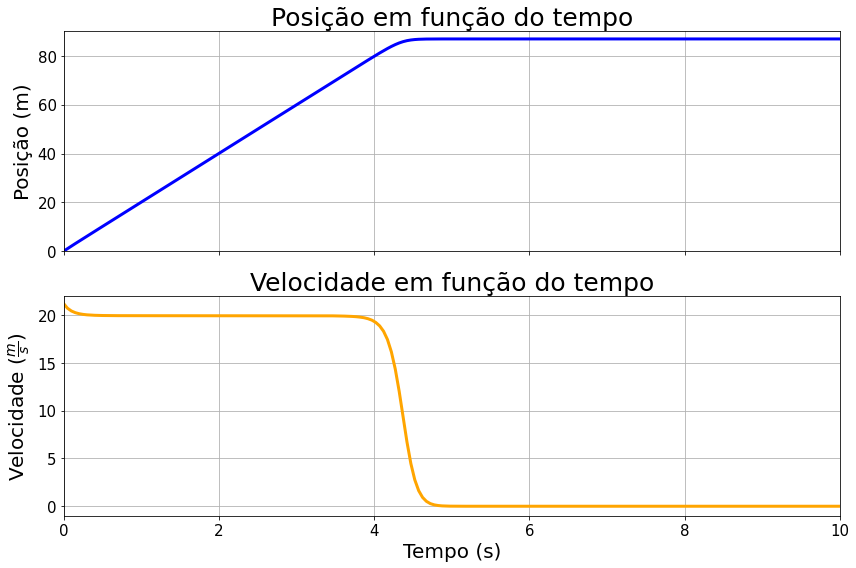

In [450]:
fig, ((x), (vx)) = plt.subplots(2, 1, sharex=True)
x.plot(sol.t, sol.y[0], label="Posição em fução do tempo", c="b")
x.set_ylabel("Posição (m)")
x.set_title("Posição em função do tempo")
x.set_xlim(0, 10)
x.set_ylim(0, 90)

vx.plot(sol.t, sol.y[2], label="Velocidade em função do tempo", c="orange")
vx.set_xlabel("Tempo (s)")
vx.set_ylabel(r"Velocidade ($\frac{m}{s}$)")
vx.set_title("Velocidade em função do tempo")
vx.set_xlim(0, 10)
vx.set_ylim(-1, 22)

ESCREVER

#### Plotando grafico da posição vertical em função do tempo:

(-20.0, 22.0)

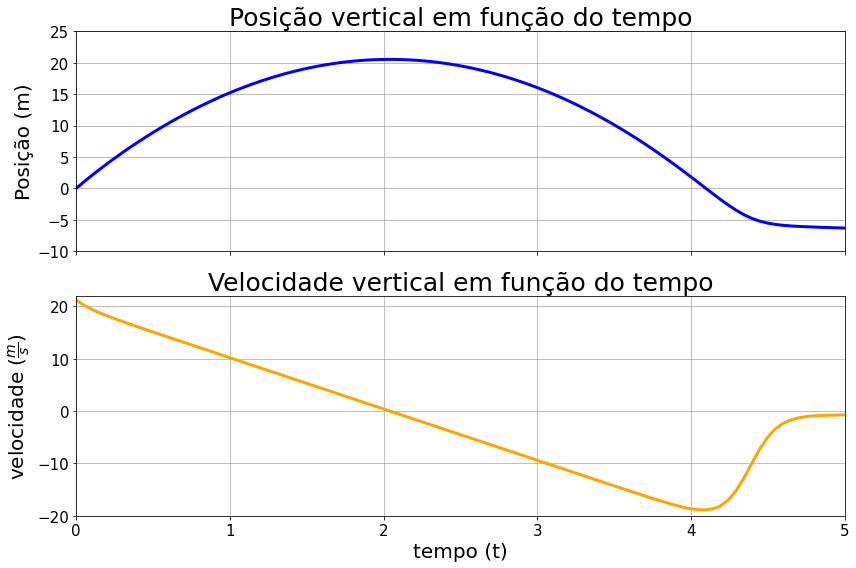

In [440]:
fig, ((z), (vz)) = plt.subplots(2, 1, sharex=True)
z.plot(sol.t, sol.y[1], c="b")
z.set_ylabel("Posição (m)")
z.set_title("Posição vertical em função do tempo")
z.set_xlim(0, 5)
z.set_ylim(-10, 25)

vz.plot(sol.t, sol.y[3], c="orange")
vz.set_ylabel(r"velocidade ($\frac{m}{s}$)")
vz.set_title("Velocidade vertical em função do tempo")
vz.set_xlabel("tempo (t)")
vz.set_xlim(0, 5)
vz.set_ylim(-20, 22)

ESCREVER SOBRE

(0.0, 40.0)

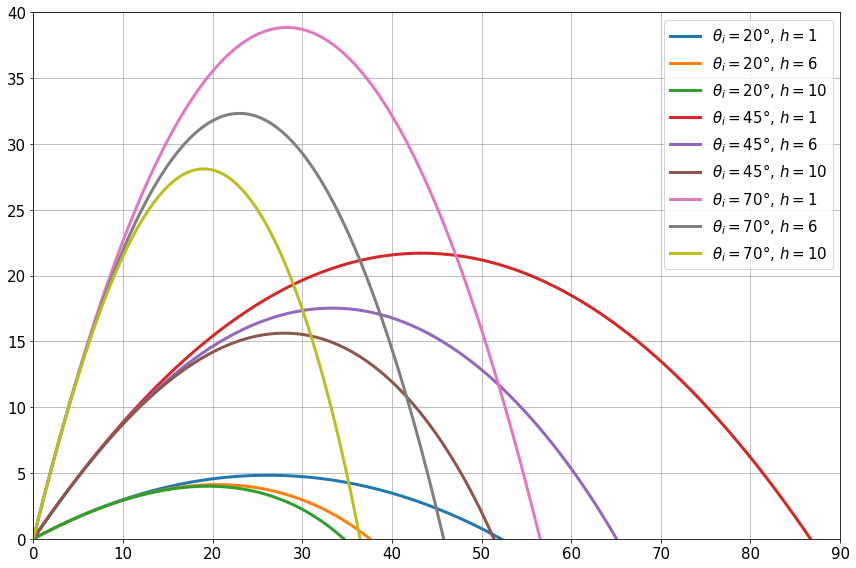

In [459]:
for _ in np.linspace(20, 70, 3, True):
    for __ in np.linspace(1, 10, 3, endpoint=True):
        h = __
        theta_i = np.radians(_)
        vx0i = v0*np.cos(theta_i)
        vz0i = v0*np.sin(theta_i)
        a = solve_ivp(fun=r_h, t_span=[t[0], t[-1]], y0=[x0, z0, vx0i, vz0i], method="LSODA",
                      t_eval=t, args=(g, b, m, h))
        plt.plot(a.y[0], a.y[1], label=r"$\theta _i=$"+f"{_:.0f}°"+r", $h=$"+f"{__:.0f}")

plt.legend()
plt.xlim(0, 90)
plt.ylim(0, 40)

ESCREVER SOBRE